In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
list_dir = [
 "08-04-2022_08-23-26",
 "07-04-2022_23-36-57",
 '06-04-2022_12-37-08',
 "08-04-2022_10-21-07",
 "07-04-2022_20-43-58",
 
]

model_list = [
    "R50-FPN_3x",
    "R101-FPN_3x",
    "X101-FPN_3x",
    "regnetx_4gf_dds_FPN_400",
    "R101-FPN_400",
]

In [40]:
no_baby = []
not_at_baby_seg = []
at_baby_seg = []

for id, (result_dir, model_name) in enumerate(zip(list_dir, model_list)):
    output_dir = os.path.join("../GazeMoCap/150210/150210_Eye/output", result_dir)
    note_dir = os.path.join(output_dir, "note.txt")
    print(id)
    with open(note_dir, mode='r') as note_file:
        print(model_name)
        all_note = note_file.read()
        print(all_note, "\n")
    
    df_dir = os.path.join(output_dir, "gaze_positions_on_baby_part_2.csv")
    df = pd.read_csv(df_dir)

    unique_frames_count = df["world_index"].nunique()

    detected_baby_df = df[df["is_baby"] == True]
    unique_detected_baby_frames = detected_baby_df["world_index"].nunique()
    
    yes_baby_pct = round(unique_detected_baby_frames/unique_frames_count*100, 2)
    print(f"Total frames having baby {unique_detected_baby_frames}, out of {unique_frames_count} frames, i.e {yes_baby_pct}% of total frames.")

    gaze_in_seg_df = detected_baby_df[detected_baby_df["in_segmentation"] == True]
    unique_frames_with_gaze_in_seg = gaze_in_seg_df["world_index"].nunique()
    at_baby_seg_pct = round(unique_frames_with_gaze_in_seg/unique_frames_count*100, 2)
    print(f"Looking at baby (in_segmentation): {unique_frames_with_gaze_in_seg}, i.e {at_baby_seg_pct}% of total frames.")
    at_baby_seg.append(at_baby_seg_pct)

    not_at_baby_seg_pct = round(yes_baby_pct - at_baby_seg_pct, 2) # round((unique_detected_baby_frames - unique_frames_with_gaze_in_seg)/unique_frames_count*100, 2)

    print(f"{unique_detected_baby_frames - unique_frames_with_gaze_in_seg}, Not looking at the baby {not_at_baby_seg_pct}%")
    not_at_baby_seg.append(not_at_baby_seg_pct)

    not_detected_baby_df = df[df["is_baby"] == False]
    unique_not_detected_baby_frames = not_detected_baby_df["world_index"].nunique()
    no_baby_pct = round(100 - yes_baby_pct, 2) # round(unique_not_detected_baby_frames/unique_frames_count*100, 2)
    print(f"Total frames having no baby {unique_not_detected_baby_frames}, out of {unique_frames_count} frames, i.e {no_baby_pct}% of total frames.")
    no_baby.append(no_baby_pct)

    print(at_baby_seg_pct + not_at_baby_seg_pct + no_baby_pct)
    print()

0
R50-FPN_3x
Fastest model: "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml" fastest 0.043 AP, 37.2 s
(run again wwith seedd)
1:14:26 + 26:42 

Total frames having baby 5704, out of 7648 frames, i.e 74.58% of total frames.
Looking at baby (in_segmentation): 2160, i.e 28.24% of total frames.
3544, Not looking at the baby 46.34%
Total frames having no baby 1944, out of 7648 frames, i.e 25.42% of total frames.
100.0

1
R101-FPN_3x
Most accurate and fast: "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml" - 38.6 AP, 0.056 s

1:26:05 (11:51) + 30:16 (4:15) = 

 

Total frames having baby 6062, out of 7648 frames, i.e 79.26% of total frames.
Looking at baby (in_segmentation): 2184, i.e 28.56% of total frames.
3878, Not looking at the baby 50.7%
Total frames having no baby 1586, out of 7648 frames, i.e 20.74% of total frames.
100.0

2
X101-FPN_3x
Most accurate: "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml": 39.5 AP, 0.103 s

1:44:17 (11:51) + 36:05 (4:15) = 2:20:22


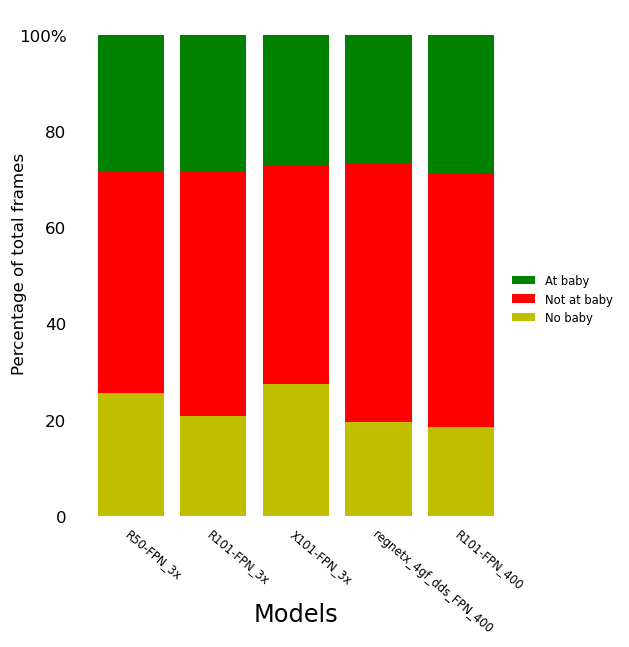

In [41]:
def plot_comparison_bw_model(no_baby_list, not_at_baby_seg_list, at_baby_seg_list):
    plt.figure(figsize=(5.5, 5.5), dpi=120, tight_layout=True)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tick_params(top=False, bottom=False, left=False, right=False)

    plt.bar(model_list, no_baby_list, color='y', label="No baby")
    plt.bar(model_list, not_at_baby_seg_list, bottom=no_baby, color='r', label="Not at baby")
    plt.bar(model_list, at_baby_seg_list, bottom=np.array(no_baby_list) + np.array(not_at_baby_seg_list), color='g', label="At baby")
    plt.xlabel("Models", fontsize="x-large", labelpad=-20)
    plt.ylabel("Percentage of total frames", labelpad=-5)
    plt.xticks(rotation=-40, ha="left", rotation_mode='anchor', fontsize="x-small")
    plt.yticks([0,20,40,60,80,100], ["0","20","40","60","80","100%"])

    #fig.autofmt_xdate(rotation=-45, ha="left")
    #get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    #specify order of items in legend
    order = [2,1,0]

    #add legend to plot
    plt.legend(
        [handles[idx] for idx in order], [labels[idx] for idx in order], 
        fontsize="x-small", 
        frameon=False, 
        bbox_to_anchor=(1.25, 0.5), 
    )

    plt.show()

plot_comparison_bw_model(no_baby, not_at_baby_seg, at_baby_seg)

# Load data

In [5]:
for result_dir in list_dir:
    output_dir = os.path.join("../GazeMoCap/150210/150210_Eye/output", result_dir)
    df_dir = os.path.join(output_dir, "gaze_positions_on_baby_part_1.csv")
    df1 = pd.read_csv(df_dir)
    df1

In [6]:
output_dir = "../GazeMoCap/100209/100209_eye/output/27-03-2022_18-13-30"
df_dir = os.path.join(output_dir, "gaze_positions_on_baby_part_2.csv")
df2 = pd.read_csv(df_dir)
df2

,world_index,confidence,norm_pos_x,norm_pos_y,world_pos,is_baby,in_segmentation,in_bounding_box
0,26550.0,1.0,0.680628,0.257281,"(740, 802)",1.0,0.0,0.0
1,26550.0,1.0,0.686083,0.258348,"(746, 800)",1.0,0.0,0.0
2,26550.0,1.0,0.695582,0.265489,"(756, 793)",1.0,0.0,0.0
3,26551.0,1.0,0.694503,0.262089,"(755, 796)",1.0,0.0,0.0
4,26551.0,1.0,0.695568,0.259214,"(756, 800)",1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
40990,43708.0,1.0,0.707277,0.933167,"(769, 72)",0.0,NaN,NaN
40991,43708.0,1.0,0.706104,0.917385,"(768, 89)",0.0,NaN,NaN
40992,43709.0,1.0,0.687348,0.896396,"(747, 111)",0.0,NaN,NaN
40993,43709.0,1.0,0.686438,0.923811,"(746, 82)",0.0,NaN,NaN


In [7]:
(df2["confidence"] == 1).all()

True

In [8]:
(df1["confidence"] == 1).all()

True

In [9]:
df1["confidence"].sum() == len(df1)

True

In [10]:
detected_baby_df = df1[df1["is_baby"] == True]
unique_detected_baby_frames = detected_baby_df["world_index"].nunique()
unique_baby_frames = df1["world_index"].nunique()
print(f"Total frames having baby {unique_detected_baby_frames}, i.e {unique_detected_baby_frames/unique_baby_frames*100:.2f}% of total frames.")

gaze_in_seg_df = detected_baby_df[detected_baby_df["in_segmentation"] == True]
unique_frames_with_gaze_in_seg = gaze_in_seg_df["world_index"].nunique()
print(f"Looking at baby (in_segmentation): {unique_frames_with_gaze_in_seg}, i.e {unique_frames_with_gaze_in_seg/unique_detected_baby_frames*100:.2f}% of frames having baby.")

Total frames having baby 16970, i.e 79.61% of total frames.
Looking at baby (in_segmentation): 5272, i.e 31.07% of frames having baby.


In [11]:
df = df1.drop_duplicates("world_index")
no_baby_count = (df["is_baby"] == True).sum()
no_baby_count

16970

# Visualization

In [12]:
# Not helpful
df = df1.drop_duplicates("world_index")
yes_baby_count = df[df["is_baby"] == True]
no_baby_count = df[df["is_baby"] == False].sum()
gaze_in_seg_df = gaze_in_seg_df.drop_duplicates(subset=["world_index"])

plt.figure(figsize=(10, 3), dpi=120)
plt.scatter(yes_baby["world_index"], yes_baby["is_baby"], marker=".", label="yes baby")
plt.scatter(no_baby["world_index"], no_baby["is_baby"], marker=".", label="no baby")



plt.bar(
    gaze_in_seg_df["world_index"],
    gaze_in_seg_df["in_segmentation"],


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_16620/2556876434.py, line 15)

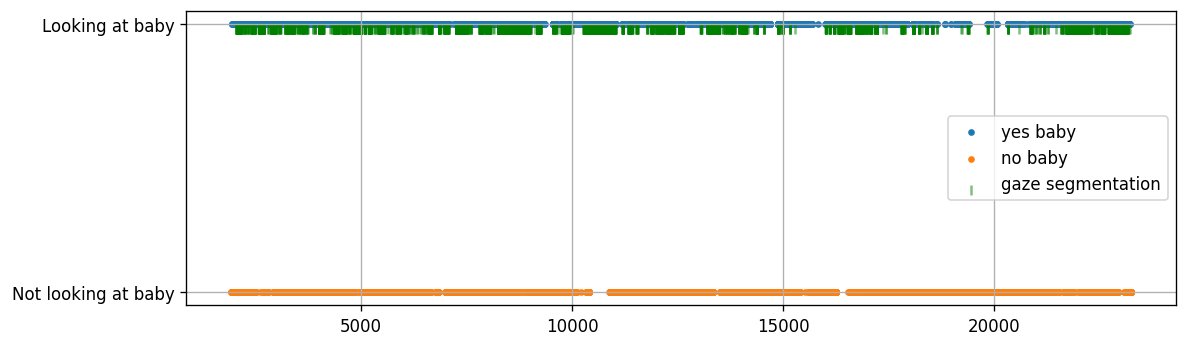

In [ ]:
# Not helpful
df = df1.drop_duplicates("world_index")
yes_baby = df[df["is_baby"] == True]
no_baby = df[df["is_baby"] == False]
gaze_in_seg_df = gaze_in_seg_df.drop_duplicates(subset=["world_index"])

plt.figure(figsize=(10, 3), dpi=120)
plt.scatter(yes_baby["world_index"], yes_baby["is_baby"], marker=".", label="yes baby")
plt.scatter(no_baby["world_index"], no_baby["is_baby"], marker=".", label="no baby")

plt.scatter(
    gaze_in_seg_df["world_index"],
    gaze_in_seg_df["in_segmentation"],
    c="g",
    marker=3,
    alpha=0.5,
    label="gaze segmentation",
)
plt.yticks([0, 1], labels=["Not looking at baby", "Looking at baby"])
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()